In [1]:
import os

In [2]:
import numpy as np
import cv2

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout , BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from keras.callbacks import ReduceLROnPlateau

In [4]:
labels = ['fire', 'no_fire']
img_size = 150
def get_training_data(data_dir):
    data = [] 
    for label in labels: 
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img))
                resized_arr = cv2.resize(img_arr, (img_size, img_size)) # Reshaping images to preferred size
                data.append([resized_arr, class_num])
            except Exception as e:
                print(e)
    return np.array(data)

In [5]:
train = get_training_data('../data/wf_images/train')
test = get_training_data('../data/wf_images/test')
val = get_training_data('../data/wf_images/val')

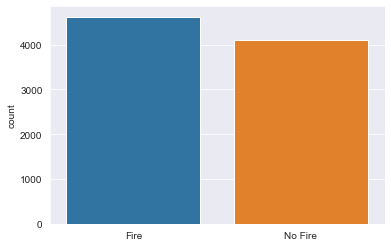

In [6]:
classification_check = []
for i in train:
    if(i[1]==0):
        classification_check.append('Fire')
    else:
        classification_check.append('No Fire')
sns.set_style('darkgrid')
sns.countplot(classification_check)

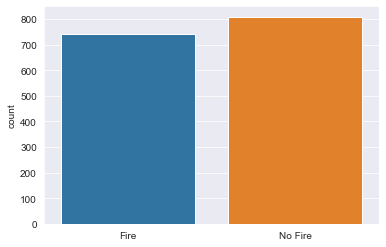

In [7]:
class_check_2 = []
for i in val:
    if(i[1]==0):
        class_check_2.append('Fire')
    else:
        class_check_2.append('No Fire')
sns.set_style('darkgrid')
sns.countplot(class_check_2)

Text(0.5, 1.0, 'no_fire')

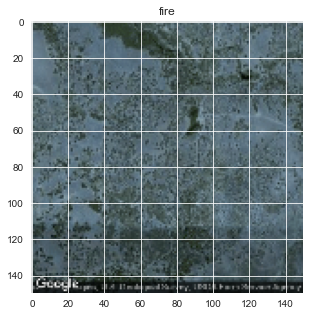

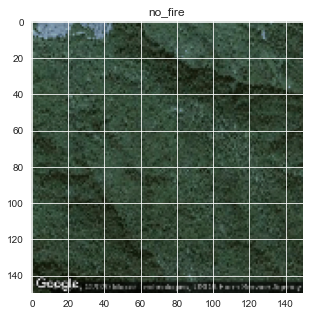

In [43]:
plt.figure(figsize = (5,5))
plt.imshow(train[0][0])
plt.title(labels[train[0][1]])

plt.figure(figsize = (5,5))
plt.imshow(train[-1][0])
plt.title(labels[train[-1][1]])

In [9]:
x_train = []
y_train = []

x_val = []
y_val = []

x_test = []
y_test = []

for feature, label in train:
    x_train.append(feature)
    y_train.append(label)

for feature, label in test:
    x_test.append(feature)
    y_test.append(label)
    
for feature, label in val:
    x_val.append(feature)
    y_val.append(label)

In [10]:
train.shape

(8736, 2)

In [11]:
# Normalize the data
x_train = np.array(x_train) / 255
x_val = np.array(x_val) / 255
x_test = np.array(x_test) / 255

In [12]:
# resize data for deep learning 
x_train = x_train.reshape(-1, img_size, img_size, 3)
y_train = np.array(y_train)

x_val = x_val.reshape(-1, img_size, img_size, 3)
y_val = np.array(y_val)

x_test = x_test.reshape(-1, img_size, img_size, 3)
y_test = np.array(y_test)

In [13]:
print(train.shape)
print(x_train.shape)

(8736, 2)
(8736, 150, 150, 3)


In [14]:
model = Sequential()
model.add(Conv2D(32, (3,3) , strides =1, padding ='same', activation = 'relu', input_shape = (150,150,3)))
model.add(MaxPool2D((2,2) , strides =2, padding ='same'))
model.add(Conv2D(64, (3,3), strides =1, padding = 'same', activation = 'relu'))
model.add(Dropout(0.1))
model.add(MaxPool2D((2,2), strides = 2, padding = 'same'))
model.add(Conv2D(64, (3,3), strides =1, padding = 'same', activation = 'relu'))
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(128 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(Dropout(0.2))
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Flatten())
model.add(Dense(units = 128 , activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(units = 1 , activation = 'sigmoid'))
model.compile(optimizer = "rmsprop" , loss = 'binary_crossentropy' , metrics = ['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 75, 75, 64)        18496     
_________________________________________________________________
dropout (Dropout)            (None, 75, 75, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 38, 38, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 38, 38, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 19, 19, 64)        0

In [15]:
x_train.shape

(8736, 150, 150, 3)

In [16]:
y_train.shape

(8736,)

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 75, 75, 64)        18496     
_________________________________________________________________
dropout (Dropout)            (None, 75, 75, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 38, 38, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 38, 38, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 19, 19, 64)        0

In [18]:
history = model.fit(x_train, y_train, batch_size = 100, epochs= 12, verbose = 1, validation_data = (x_val, y_val))

Epoch 1/12
88/88 [==============================] - 195s 2s/step - loss: 0.6952 - accuracy: 0.5686 - val_loss: 0.6625 - val_accuracy: 0.6299
Epoch 2/12
88/88 [==============================] - 183s 2s/step - loss: 0.6511 - accuracy: 0.6395 - val_loss: 0.6505 - val_accuracy: 0.6673
Epoch 3/12
88/88 [==============================] - 192s 2s/step - loss: 0.6184 - accuracy: 0.6643 - val_loss: 0.6838 - val_accuracy: 0.5261
Epoch 4/12
88/88 [==============================] - 188s 2s/step - loss: 0.6130 - accuracy: 0.6772 - val_loss: 0.7053 - val_accuracy: 0.5119
Epoch 5/12
88/88 [==============================] - 184s 2s/step - loss: 0.5846 - accuracy: 0.6971 - val_loss: 0.6377 - val_accuracy: 0.6441
Epoch 6/12
88/88 [==============================] - 186s 2s/step - loss: 0.5646 - accuracy: 0.7105 - val_loss: 0.6518 - val_accuracy: 0.5642
Epoch 7/12
88/88 [==============================] - 181s 2s/step - loss: 0.5561 - accuracy: 0.7167 - val_loss: 0.6240 - val_accuracy: 0.6415
Epoch 8/12
88

In [27]:
y_pred= model.predict_classes(x_test)

In [19]:
model_2 = Sequential()
model_2.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer = 'he_normal', padding = 'same',
                        input_shape=(150, 150,  3)))
model_2.add(MaxPool2D((2, 2)))

model_2.add(Conv2D(128, (3, 3), kernel_initializer = 'he_normal', activation='relu', padding = 'same'))
model_2.add(Conv2D(128, (3, 3), kernel_initializer = 'he_normal', activation='relu', padding = 'same'))
model_2.add(MaxPool2D((2, 2)))

model_2.add(Conv2D(256, (3, 3), kernel_initializer = 'he_normal', activation='relu', padding = 'same'))
model_2.add(Conv2D(256, (3, 3), kernel_initializer = 'he_normal', activation='relu', padding = 'same'))
model_2.add(MaxPool2D((2, 2)))

model_2.add(Flatten())
model_2.add(Dense(500, activation='relu'))
model_2.add(Dropout(.5))
model_2.add(Dense(250, activation='relu'))
model_2.add(Dropout(.5))
model_2.add(Dense(1, activation='sigmoid'))

model_2.compile(loss='binary_crossentropy',
              optimizer="sgd",
              metrics=['acc'])

In [20]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience = 5, restore_best_weights=True)

In [21]:
history_2= model_2.fit(x_train, y_train, epochs = 20, batch_size= 32, 
                       validation_data= (x_val, y_val), callbacks = [early_stopping_cb])

Epoch 1/20
273/273 [==============================] - 965s 4s/step - loss: 0.6984 - acc: 0.5594 - val_loss: 0.6768 - val_acc: 0.5603
Epoch 2/20
273/273 [==============================] - 967s 4s/step - loss: 0.6603 - acc: 0.6062 - val_loss: 0.6740 - val_acc: 0.5912
Epoch 3/20
273/273 [==============================] - 957s 4s/step - loss: 0.6360 - acc: 0.6429 - val_loss: 0.6638 - val_acc: 0.5500
Epoch 4/20
273/273 [==============================] - 959s 4s/step - loss: 0.6155 - acc: 0.6731 - val_loss: 0.6214 - val_acc: 0.6435
Epoch 5/20
273/273 [==============================] - 958s 4s/step - loss: 0.6003 - acc: 0.6904 - val_loss: 0.7264 - val_acc: 0.5268
Epoch 6/20
273/273 [==============================] - 959s 4s/step - loss: 0.5910 - acc: 0.7010 - val_loss: 0.6419 - val_acc: 0.6254
Epoch 7/20
273/273 [==============================] - 957s 4s/step - loss: 0.5771 - acc: 0.7083 - val_loss: 0.7128 - val_acc: 0.5609
Epoch 8/20
273/273 [==============================] - 958s 4s/step - 

In [23]:
model_2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 150, 150, 64)      1792      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 75, 75, 64)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 75, 75, 128)       73856     
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 75, 75, 128)       147584    
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 37, 37, 128)       0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 37, 37, 256)       295168    
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 37, 37, 256)      

In [22]:
preds_2= model_2.predict_classes(x_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [26]:
#epochs = [i for i in range(12)]
#fig , ax = plt.subplots(1,2)
#train_acc = history.history['accuracy']
#train_loss = history.history['loss']
#val_acc = history.history['val_accuracy']
#val_loss = history.history['val_loss']
#fig.set_size_inches(20,10)

#ax[0].plot(epochs , train_acc , 'go-' , label = 'Training Accuracy')
#ax[0].plot(epochs , val_acc , 'ro-' , label = 'Validation Accuracy')
#ax[0].set_title('Training & Validation Accuracy')
#ax[0].legend()
#ax[0].set_xlabel("Epochs")
#ax[0].set_ylabel("Accuracy")

#ax[1].plot(epochs , train_loss , 'g-o' , label = 'Training Loss')
#ax[1].plot(epochs , val_loss , 'r-o' , label = 'Validation Loss')
#ax[1].set_title('Testing Accuracy & Loss')
#ax[1].legend()
#ax[1].set_xlabel("Epochs")
#ax[1].set_ylabel("Training & Validation Loss")
#plt.show()

In [20]:
predictions = model.predict_classes(x_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [28]:
print(classification_report(y_test, y_pred)) #model 1 performance

              precision    recall  f1-score   support

           0       0.51      0.31      0.39      1008
           1       0.52      0.71      0.60      1056

    accuracy                           0.52      2064
   macro avg       0.51      0.51      0.49      2064
weighted avg       0.51      0.52      0.50      2064



In [25]:
print(classification_report(y_test, preds_2)) #model 2 performance




              precision    recall  f1-score   support

           0       0.45      0.29      0.35      1008
           1       0.50      0.67      0.57      1056

    accuracy                           0.48      2064
   macro avg       0.48      0.48      0.46      2064
weighted avg       0.48      0.48      0.46      2064



In [41]:
model.save('../pickled_models')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: ../pickled_models\assets


In [42]:
model_2.save('../pickled_models')

INFO:tensorflow:Assets written to: ../pickled_models\assets


In [38]:
weights = model.get_weights()
weights

[array([[[[ 0.08106142, -0.17851716, -0.15741658,  0.0582048 ,
           -0.00862494, -0.00405595, -0.09962498,  0.0072911 ,
           -0.0635112 , -0.08736242, -0.09663469, -0.04475162,
            0.00777428,  0.00582506,  0.0149475 , -0.10995608,
            0.0420554 ,  0.06371187,  0.15228549,  0.13045871,
            0.07042921,  0.03465978,  0.10221705, -0.00921909,
           -0.07155661,  0.06149915, -0.04404622, -0.05593898,
           -0.13994773,  0.06167929, -0.11009318, -0.06213287],
          [-0.11920611, -0.05882459, -0.14010221,  0.02710545,
           -0.11272837, -0.08911336,  0.0494305 ,  0.13083036,
            0.01581325,  0.00541402, -0.12908089,  0.02705769,
            0.11529004, -0.05007355,  0.10570019, -0.10842437,
           -0.14508131,  0.02775955,  0.03487288, -0.11874995,
           -0.11748259,  0.02425413, -0.11531386, -0.12876584,
           -0.12507558, -0.04484617, -0.00616726, -0.10008442,
           -0.0527188 , -0.03010722, -0.08217862,  0.0

In [39]:
import pickle as pkl
file = open('model_1_fsm.pkl', 'wb')
pkl.dump(weights, file, protocol=pkl.HIGHEST_PROTOCOL)
file.close()

TypeError: cannot pickle '_thread.RLock' object

In [37]:
file= open('model_1_fsm.pkl', 'rb')
saved_model = pkl.load(file)
file.close()

EOFError: Ran out of input

In [30]:
#early_stopping_cb = keras.callbacks.EarlyStopping(patience = 5)

# With data augmentation to prevent overfitting and handling the imbalance in dataset

datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range = 30,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.2, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip = True,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(x_train)

In [34]:
model_3 = Sequential()
model_3.add(Conv2D(32 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu' , input_shape = (150,150,3)))
model_3.add(BatchNormalization())
model_3.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model_3.add(Conv2D(64 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model_3.add(Dropout(0.1))
model_3.add(BatchNormalization())
model_3.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model_3.add(Conv2D(64 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model_3.add(BatchNormalization())
model_3.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model_3.add(Conv2D(128 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model_3.add(Dropout(0.2))
model_3.add(BatchNormalization())
model_3.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model_3.add(Conv2D(256 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model_3.add(Dropout(0.2))
model_3.add(BatchNormalization())
model_3.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model_3.add(Flatten())
model_3.add(Dense(units = 128 , activation = 'relu'))
model_3.add(Dropout(0.2))
model_3.add(Dense(units = 1 , activation = 'sigmoid'))
model_3.compile(optimizer = "rmsprop" , loss = 'binary_crossentropy' , metrics = ['accuracy'])
model_3.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 150, 150, 32)      896       
_________________________________________________________________
batch_normalization (BatchNo (None, 150, 150, 32)      128       
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 75, 75, 64)        18496     
_________________________________________________________________
dropout_9 (Dropout)          (None, 75, 75, 64)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 75, 75, 64)        256       
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 38, 38, 64)       

In [35]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience = 2, verbose=1,factor=0.3, min_lr=0.000001)

In [36]:
history_3 = model_3.fit(datagen.flow(x_train,y_train, batch_size = 32) ,epochs = 12 , validation_data = datagen.flow(x_val, y_val) ,callbacks = [learning_rate_reduction])


Epoch 1/12
273/273 [==============================] - 404s 1s/step - loss: 0.8282 - accuracy: 0.6596 - val_loss: 0.8033 - val_accuracy: 0.5280
Epoch 2/12
273/273 [==============================] - 413s 2s/step - loss: 0.5883 - accuracy: 0.7017 - val_loss: 0.7069 - val_accuracy: 0.5100
Epoch 3/12
273/273 [==============================] - ETA: 0s - loss: 0.5668 - accuracy: 0.7270
Epoch 00003: ReduceLROnPlateau reducing learning rate to 0.0003000000142492354.
273/273 [==============================] - 422s 2s/step - loss: 0.5668 - accuracy: 0.7270 - val_loss: 0.7416 - val_accuracy: 0.5164
Epoch 4/12
273/273 [==============================] - 442s 2s/step - loss: 0.5135 - accuracy: 0.7537 - val_loss: 0.6880 - val_accuracy: 0.6061
Epoch 5/12
273/273 [==============================] - 422s 2s/step - loss: 0.4976 - accuracy: 0.7640 - val_loss: 0.8039 - val_accuracy: 0.5274
Epoch 6/12
273/273 [==============================] - ETA: 0s - loss: 0.4928 - accuracy: 0.7619
Epoch 00006: ReduceLROnP

In [40]:
predictions_3 = model_3.predict_classes(x_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [41]:
print(classification_report(y_test, predictions_3))

              precision    recall  f1-score   support

           0       0.17      0.04      0.07      1008
           1       0.47      0.81      0.60      1056

    accuracy                           0.44      2064
   macro avg       0.32      0.43      0.33      2064
weighted avg       0.32      0.44      0.34      2064



# Model Performance

